## Python Libraries

!pip install pandas numpy matplotlib seaborn requests

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('daily_aqi_by_county_2024.csv' , engine='python', sep=',', quotechar='"', on_bad_lines='skip')

In [3]:
df.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3.0,2024-01-03,41.0,Good,PM2.5,01-003-0010,1.0
1,Alabama,Baldwin,1,3.0,2024-01-04,38.0,Good,PM2.5,01-003-0010,1.0
2,Alabama,Baldwin,1,3.0,2024-01-05,44.0,Good,PM2.5,01-003-0010,1.0
3,Alabama,Baldwin,1,3.0,2024-01-06,7.0,Good,PM2.5,01-003-0010,1.0
4,Alabama,Baldwin,1,3.0,2024-01-07,29.0,Good,PM2.5,01-003-0010,1.0


In [4]:
df.shape

(143065, 10)

In [5]:
df['State Name'].unique()[:20]   # first 20 states

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Country Of Mexico', 'Delaware',
       'District Of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana'],
      dtype=object)

In [6]:
df['county Name'].unique()[:20]  # first 20 counties

array(['Baldwin', 'Clay', 'DeKalb', 'Elmore', 'Etowah', 'Jefferson',
       'Lawrence', 'Madison', 'Mobile', 'Montgomery', 'Morgan', 'Russell',
       'Shelby', 'Sumter', 'Tuscaloosa', 'Aleutians East ', 'Anchorage ',
       'Denali ', 'Fairbanks North Star ', 'Juneau '], dtype=object)

In [7]:
print("Columns:", df.columns.tolist())

Columns: ['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI', 'Category', 'Defining Parameter', 'Defining Site', 'Number of Sites Reporting']


In [8]:
print("\nData types:")
df.dtypes


Data types:


,0
State Name,object
county Name,object
State Code,int64
County Code,float64
Date,object
AQI,float64
Category,object
Defining Parameter,object
Defining Site,object
Number of Sites Reporting,float64


In [9]:
print("\nMissing values per column:")
df.isna().sum()


Missing values per column:


,0
State Name,0
county Name,0
State Code,0
County Code,1
Date,1
AQI,1
Category,1
Defining Parameter,1
Defining Site,1
Number of Sites Reporting,1


In [10]:
df.sample(5)

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
97043,Iowa,Black Hawk,19,13.0,2024-11-17,57.0,Moderate,PM2.5,19-013-0009,1.0
46734,Florida,Alachua,12,1.0,2024-03-30,49.0,Good,Ozone,12-001-3012,1.0
882,Alabama,DeKalb,1,49.0,2024-06-22,55.0,Moderate,PM2.5,01-049-1003,2.0
98157,Iowa,Johnson,19,103.0,2024-08-14,53.0,Moderate,PM2.5,19-103-2001,1.0
32268,Colorado,Adams,8,1.0,2024-05-18,54.0,Moderate,Ozone,08-001-3001,2.0


In [11]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [12]:
df.sample(5)

,state_name,county_name,state_code,county_code,date,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
101944,Kansas,Johnson,20,91.0,2024-08-20,77.0,Moderate,PM2.5,20-091-0010,1.0
93780,Indiana,Shelby,18,145.0,2024-05-12,50.0,Good,Ozone,18-145-0001,1.0
53167,Florida,Leon,12,73.0,2024-05-07,39.0,Good,PM2.5,12-073-0012,1.0
3497,Alabama,Morgan,1,103.0,2024-10-08,42.0,Good,Ozone,01-103-0011,1.0
134181,Michigan,Benzie,26,19.0,2024-04-17,36.0,Good,Ozone,26-019-0003,1.0


### Datetime Dtype

In [13]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [14]:
df['aqi'] = pd.to_numeric(df['aqi'], errors='coerce')

### Na Values Filling

In [15]:
df['county_code'] = df['county_code'].fillna(0).astype(int)

In [16]:
df['number_of_sites_reporting'] = df['number_of_sites_reporting'].fillna(0).astype(int)

In [17]:
df['category'] = df['category'].fillna("Unknown")

In [18]:
df['defining_parameter'] = df['defining_parameter'].fillna("Unknown")

In [19]:
df['defining_site'] = df['defining_site'].fillna("Unknown")

In [20]:
df['aqi'] = df['aqi'].fillna(df['aqi'].median())

In [21]:
print("Data after cleaning:")
print(df.dtypes)
print(df.isna().sum())

Data after cleaning:
state_name                           object
county_name                          object
state_code                            int64
county_code                           int64
date                         datetime64[ns]
aqi                                 float64
category                             object
defining_parameter                   object
defining_site                        object
number_of_sites_reporting             int64
dtype: object
state_name                   0
county_name                  0
state_code                   0
county_code                  0
date                         1
aqi                          0
category                     0
defining_parameter           0
defining_site                0
number_of_sites_reporting    0
dtype: int64


In [22]:
df.head()

,state_name,county_name,state_code,county_code,date,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
0,Alabama,Baldwin,1,3,2024-01-03,41.0,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2024-01-04,38.0,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2024-01-05,44.0,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2024-01-06,7.0,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2024-01-07,29.0,Good,PM2.5,01-003-0010,1


In [23]:
df = df.dropna(subset=['date'])
print("Shape:", df.shape)

Shape: (143064, 10)


In [24]:
print("\nDate range:", df['date'].min(), "to", df['date'].max())
print("\nUnique states:", df['state_name'].nunique())
print("Unique counties:", df['county_name'].nunique())


Date range: 2024-01-01 00:00:00 to 2024-12-31 00:00:00

Unique states: 25
Unique counties: 381


In [25]:
print("\nAQI Summary:")
print(df['aqi'].describe())
print("\nTop AQI Categories:")
print(df['category'].value_counts())


AQI Summary:
count    143064.000000
mean         43.575763
std          20.476097
min           0.000000
25%          32.000000
50%          42.000000
75%          52.000000
max        1513.000000
Name: aqi, dtype: float64

Top AQI Categories:
category
Good                              102608
Moderate                           38203
Unhealthy for Sensitive Groups      1776
Unhealthy                            402
Very Unhealthy                        63
Hazardous                             12
Name: count, dtype: int64


In [26]:
df['state_name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Country Of Mexico', 'Delaware',
       'District Of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota'],
      dtype=object)

In [27]:
state_choice = "Arizona"
county_choice = "Maricopa"

df_city = df[(df['state_name'] == state_choice) &
             (df['county_name'] == county_choice)].copy()

In [28]:
print("Filtered dataset shape:", df_city.shape)
print("Date range:", df_city['date'].min(), "to", df_city['date'].max())
print(df_city['category'].value_counts())
df_city.head()

Filtered dataset shape: (366, 10)
Date range: 2024-01-01 00:00:00 to 2024-12-31 00:00:00
category
Moderate                          260
Unhealthy for Sensitive Groups     65
Good                               33
Unhealthy                           7
Very Unhealthy                      1
Name: count, dtype: int64


,state_name,county_name,state_code,county_code,date,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
8739,Arizona,Maricopa,4,13,2024-01-01,261.0,Very Unhealthy,PM2.5,04-013-0019,30
8740,Arizona,Maricopa,4,13,2024-01-02,80.0,Moderate,PM2.5,04-013-4003,30
8741,Arizona,Maricopa,4,13,2024-01-03,59.0,Moderate,PM2.5,04-013-4003,30
8742,Arizona,Maricopa,4,13,2024-01-04,38.0,Good,Ozone,04-013-9508,30
8743,Arizona,Maricopa,4,13,2024-01-05,64.0,Moderate,PM2.5,04-013-9812,30


In [29]:
df_city

,state_name,county_name,state_code,county_code,date,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
8739,Arizona,Maricopa,4,13,2024-01-01,261.0,Very Unhealthy,PM2.5,04-013-0019,30
8740,Arizona,Maricopa,4,13,2024-01-02,80.0,Moderate,PM2.5,04-013-4003,30
8741,Arizona,Maricopa,4,13,2024-01-03,59.0,Moderate,PM2.5,04-013-4003,30
8742,Arizona,Maricopa,4,13,2024-01-04,38.0,Good,Ozone,04-013-9508,30
8743,Arizona,Maricopa,4,13,2024-01-05,64.0,Moderate,PM2.5,04-013-9812,30
...,...,...,...,...,...,...,...,...,...,...
9100,Arizona,Maricopa,4,13,2024-12-27,76.0,Moderate,PM10,04-013-9812,30
9101,Arizona,Maricopa,4,13,2024-12-28,82.0,Moderate,PM2.5,04-013-0019,30
9102,Arizona,Maricopa,4,13,2024-12-29,82.0,Moderate,PM2.5,04-013-0019,30
9103,Arizona,Maricopa,4,13,2024-12-30,90.0,Moderate,PM2.5,04-013-9812,30


In [54]:
df

,state_name,county_name,state_code,county_code,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
date,,,,,,,,,
2024-01-01,Arizona,Maricopa,4,13,261.0,Very Unhealthy,PM2.5,04-013-0019,30
2024-01-02,Arizona,Maricopa,4,13,80.0,Moderate,PM2.5,04-013-4003,30
2024-01-03,Arizona,Maricopa,4,13,59.0,Moderate,PM2.5,04-013-4003,30
2024-01-04,Arizona,Maricopa,4,13,38.0,Good,Ozone,04-013-9508,30
2024-01-05,Arizona,Maricopa,4,13,64.0,Moderate,PM2.5,04-013-9812,30
...,...,...,...,...,...,...,...,...,...
2024-12-27,Arizona,Maricopa,4,13,76.0,Moderate,PM10,04-013-9812,30
2024-12-28,Arizona,Maricopa,4,13,82.0,Moderate,PM2.5,04-013-0019,30
2024-12-29,Arizona,Maricopa,4,13,82.0,Moderate,PM2.5,04-013-0019,30


In [30]:
df = df_city.copy()

In [31]:
df.shape

(366, 10)

# Plots

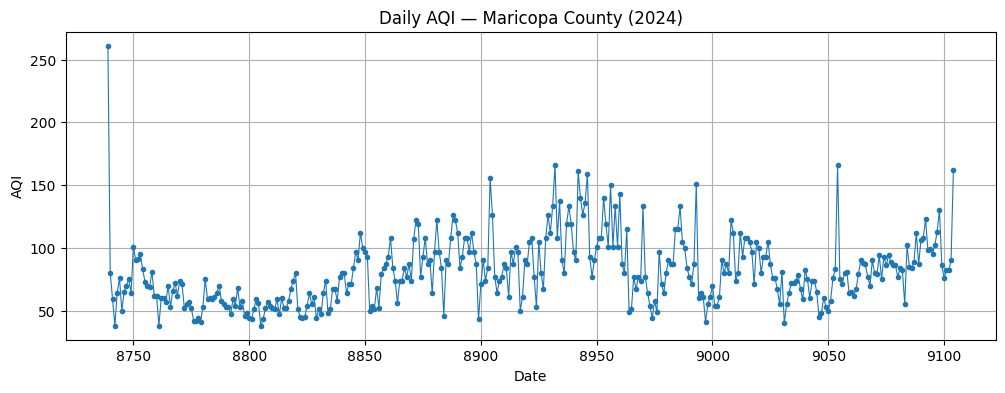

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(df.index, df['aqi'], marker='.', linewidth=0.8)
plt.title('Daily AQI — Maricopa County (2024)')
plt.xlabel('Date'); plt.ylabel('AQI'); plt.grid(True)
plt.show()


### Distribution Plots

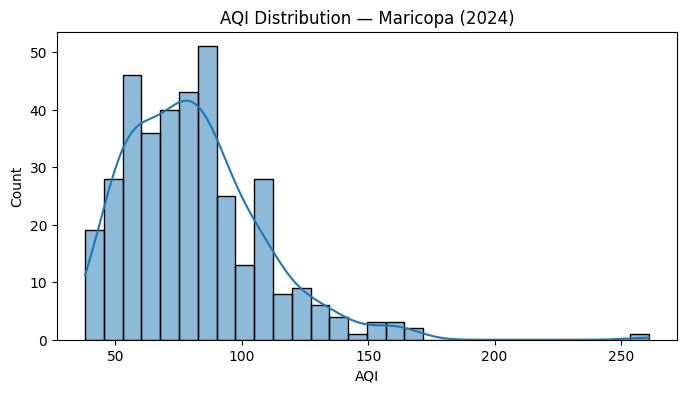

In [33]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.histplot(df['aqi'].dropna(), bins=30, kde=True)
plt.title('AQI Distribution — Maricopa (2024)')
plt.xlabel('AQI'); plt.show()

### AQI Categories Count

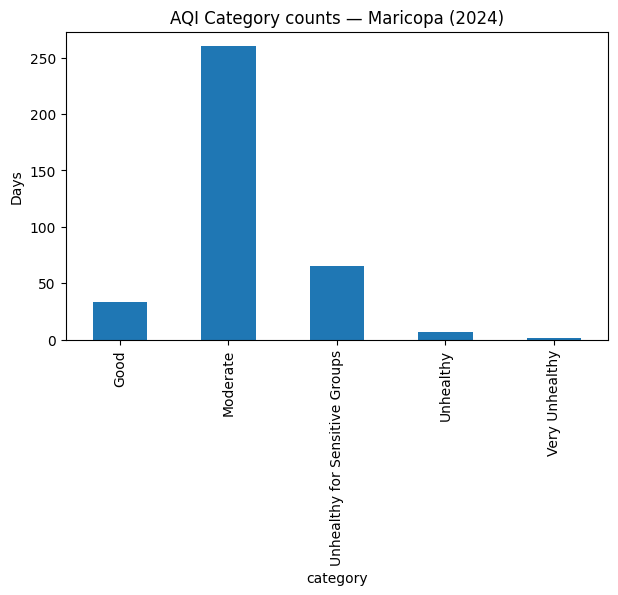

In [34]:

order = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous']
(df['category']
 .value_counts()
 .reindex([c for c in order if c in df['category'].unique()])
 .plot(kind='bar', figsize=(7,4)))
plt.title('AQI Category counts — Maricopa (2024)'); plt.ylabel('Days'); plt.show()


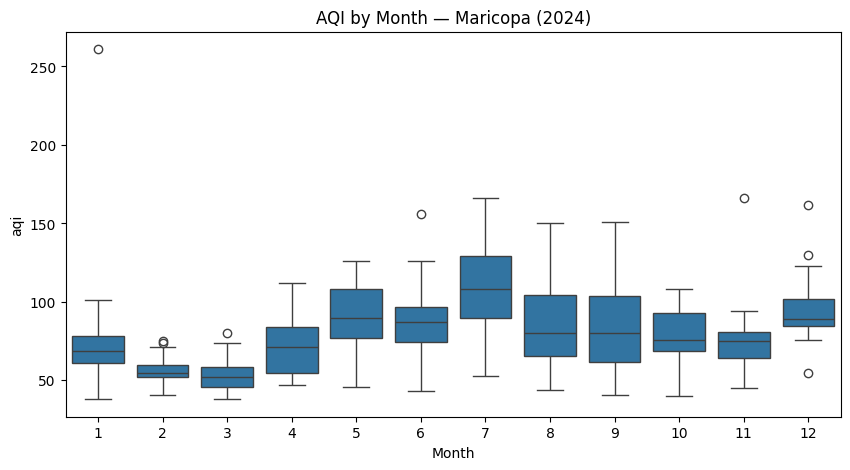

In [35]:
df['month'] = df['date'].dt.month
plt.figure(figsize=(10,5))
sns.boxplot(x='month', y='aqi', data=df)
plt.title('AQI by Month — Maricopa (2024)'); plt.xlabel('Month'); plt.show()

In [37]:
miss = df.isna().mean().sort_values(ascending=False)
print("Missing fraction per column:\n", miss[miss>0])
all_dates = pd.date_range(df['date'].min(), df['date'].max(), freq='D')
missing_dates = all_dates.difference(df['date'])
print("Missing date count:", len(missing_dates))
if len(missing_dates)>0:
    print("Sample missing dates:", list(missing_dates[:10]))
    print(df.index.dtype)
# Keep only rows with valid 2024 dates
df = df[(df['date'] >= "2024-01-01") & (df['date'] <= "2024-12-31")]

Missing fraction per column:
 Series([], dtype: float64)
Missing date count: 0


### Missing Data & Date Continuity Check
- Checked all columns: **no missing values**.  
- Checked date index: **no missing dates** between 2024-01-01 and 2024-12-31.  
- This confirms the dataset is **complete and continuous**, which is essential for time-series forecasting.  

The data is fully clean and ready for feature engineering and modeling.


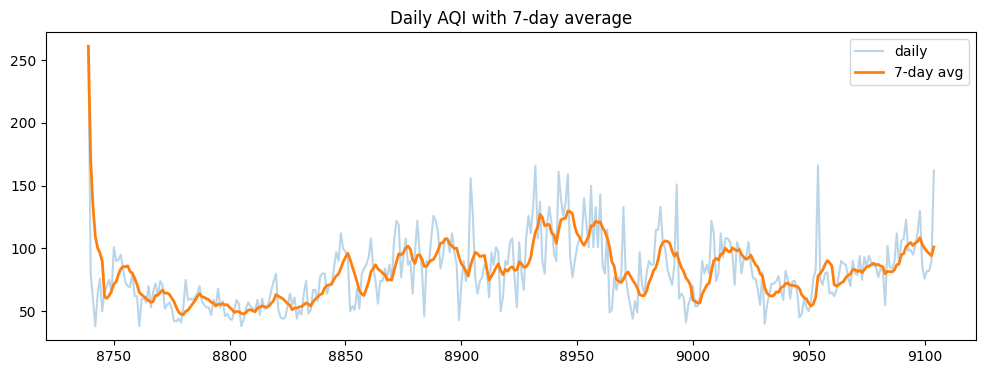

In [38]:
df['aqi_7d'] = df['aqi'].rolling(7, min_periods=1).mean()
plt.figure(figsize=(12,4))
plt.plot(df.index, df['aqi'], alpha=0.3, label='daily')
plt.plot(df.index, df['aqi_7d'], linewidth=2, label='7-day avg')
plt.legend(); plt.title('Daily AQI with 7-day average'); plt.show()


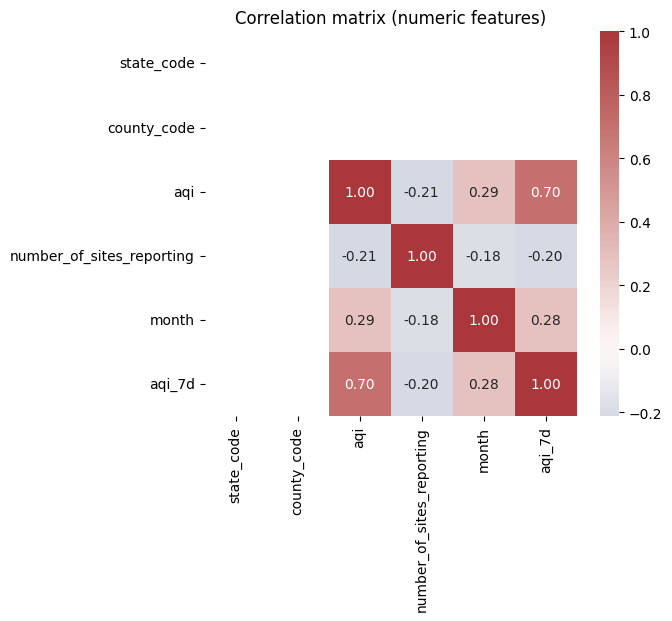

aqi                          1.000000
aqi_7d                       0.702328
month                        0.285631
number_of_sites_reporting   -0.212565
state_code                        NaN
county_code                       NaN
Name: aqi, dtype: float64


In [39]:
num = df.select_dtypes(include=['number'])
if 'aqi' in num.columns:
    corr = num.corr()
    plt.figure(figsize=(6,5))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', center=0)
    plt.title('Correlation matrix (numeric features)'); plt.show()
    print(corr['aqi'].sort_values(ascending=False))
else:
    print("No numeric columns found other than AQI")


In [42]:
print("Monthly mean AQI:")
#df_indexed = df.set_index('date') # This line was commented out, causing the error
print(df.set_index('date')['aqi'].resample('M').mean().round(2))

print("\nWeekday mean AQI:")
# Set the date column as the index again for weekday calculation
df = df.set_index('date')
df['weekday'] = df.index.day_name()
print(df.groupby('weekday')['aqi'].mean().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).round(2))

Monthly mean AQI:
date
2024-01-31     74.74
2024-02-29     56.38
2024-03-31     53.55
2024-04-30     72.27
2024-05-31     91.71
2024-06-30     87.47
2024-07-31    109.81
2024-08-31     88.42
2024-09-30     84.77
2024-10-31     79.74
2024-11-30     75.07
2024-12-31     94.94
Freq: ME, Name: aqi, dtype: float64

Weekday mean AQI:
weekday
Monday       87.79
Tuesday      81.40
Wednesday    82.62
Thursday     80.10
Friday       85.13
Saturday     75.12
Sunday       73.87
Name: aqi, dtype: float64


### Interpretation of Monthly & Weekday AQI Trends

- **Monthly AQI:**
  - AQI levels are **lowest in February–March** (~53–56), indicating cleaner winter/early spring air.  
  - AQI levels are **highest in July (109.8)** and December (94.9), showing strong **seasonal effects**.  
  - Likely causes: summer ozone buildup and winter pollution trapping.  

- **Weekday AQI:**
  - AQI is **higher on weekdays (Mon–Fri, 80–88)** compared to weekends (Sat–Sun, 73–75).  
  - This suggests human activities such as traffic and industry contribute to poorer air quality during the workweek.  

These results highlight **seasonal and weekly trends** that are important for forecasting AQI.


### Distribution of Defining Parameters (Pollutants)

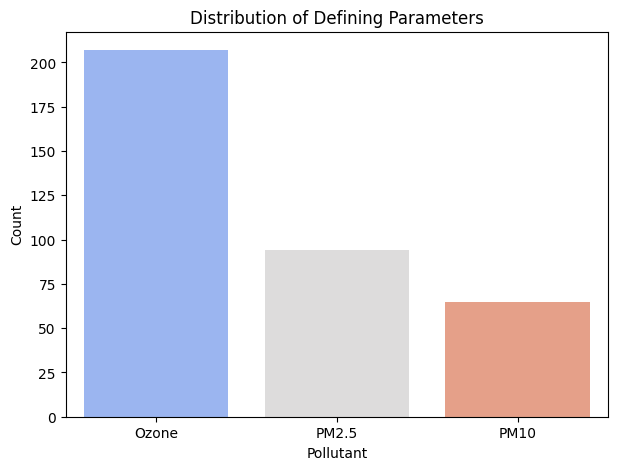

In [43]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="defining_parameter", order=df["defining_parameter"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Defining Parameters")
plt.xlabel("Pollutant")
plt.ylabel("Count")
plt.show()

### Distribution of Defining Parameters (Explanation)

This chart shows how often each pollutant was the **defining factor** for the daily AQI.

- **Ozone** and **PM2.5** are the most common pollutants that determine daily AQI levels.  
- **PM10, NO₂, and CO** rarely act as the defining parameter.  
- Interpretation: Air quality in this dataset is primarily impacted by Ozone (ground-level smog) and PM2.5 (fine particles), while other pollutants contribute less frequently.

This helps us understand which pollutants are most important when studying AQI trends and building predictive models.


## Trends

### Average AQI Over Time (Monthly Trend)

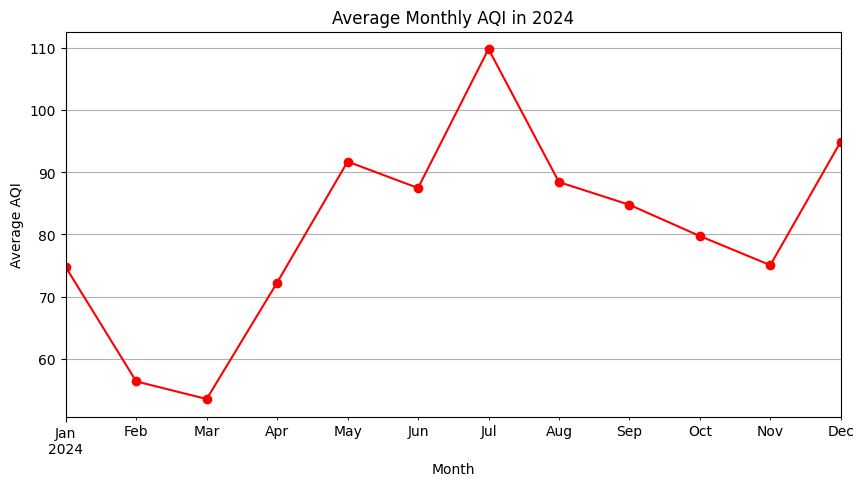

In [44]:
monthly_aqi = df.groupby(df.index.to_period("M"))["aqi"].mean()

plt.figure(figsize=(10,5))
monthly_aqi.plot(marker="o", color="red")
plt.title("Average Monthly AQI in 2024")
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.grid(True)
plt.show()

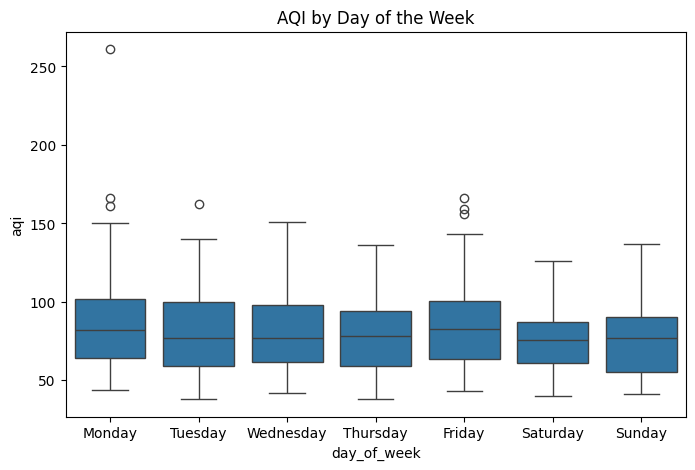

In [45]:
df["day_of_week"] = df.index.day_name()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="day_of_week", y="aqi", order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("AQI by Day of the Week")
plt.show()

### States with Highest AQI

### Average AQI due to Pollutants

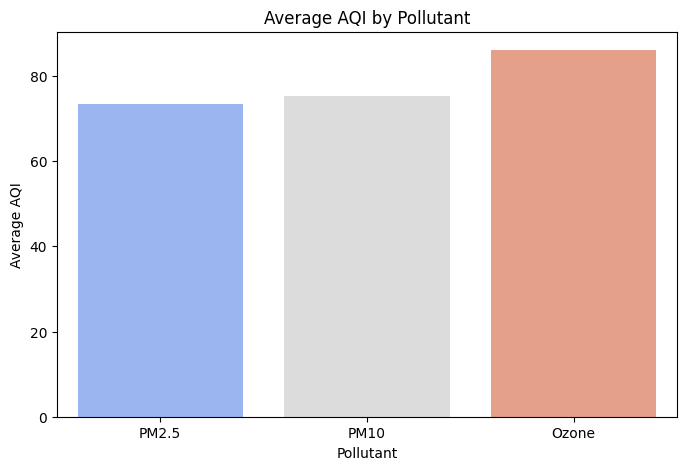

In [46]:
pollutant_aqi = df.groupby("defining_parameter")["aqi"].mean().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=pollutant_aqi.index, y=pollutant_aqi.values, palette="coolwarm")
plt.title("Average AQI by Pollutant")
plt.xlabel("Pollutant")
plt.ylabel("Average AQI")
plt.show()

### Category Trends Over Time

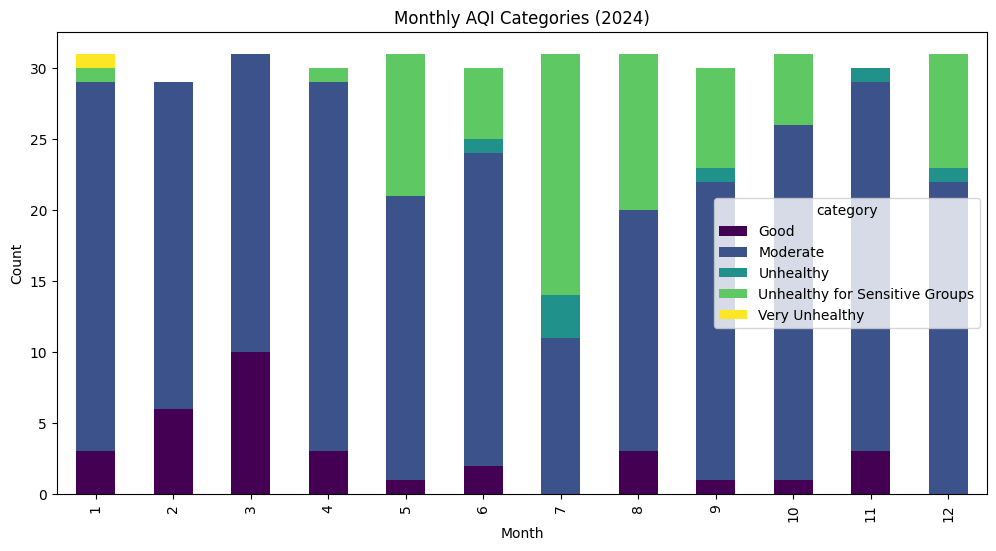

In [47]:
df['month'] = df.index.month
monthly_cat = df.groupby([df["month"], "category"]).size().unstack()

monthly_cat.plot(kind="bar", stacked=True, figsize=(12,6), colormap="viridis")
plt.title("Monthly AQI Categories (2024)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

### Outlier Detection

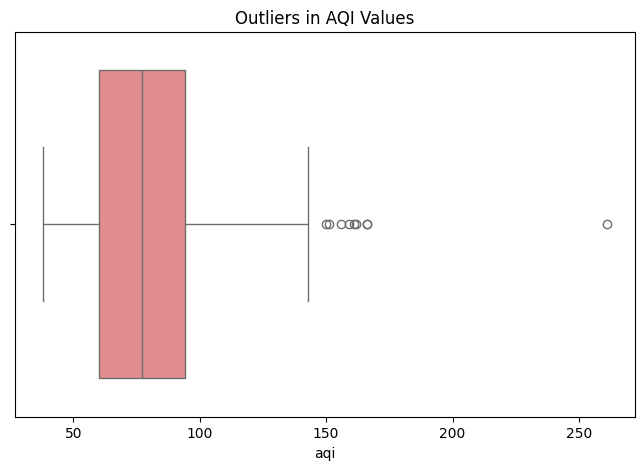

In [48]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["aqi"], color="lightcoral")
plt.title("Outliers in AQI Values")
plt.show()

### State-wise AQI Distribution

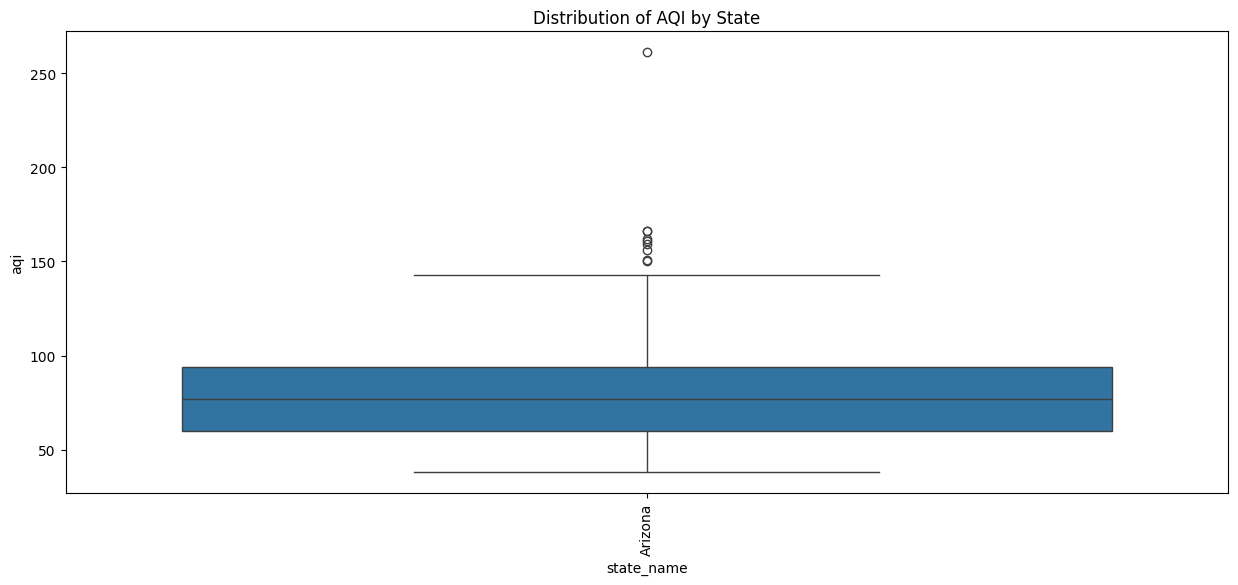

In [49]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x="state_name", y="aqi")
plt.xticks(rotation=90)
plt.title("Distribution of AQI by State")
plt.show()

In [50]:
# Correlation of numeric columns with AQI
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
if 'aqi' in numeric_cols:
    numeric_cols.remove('aqi')

corrs = df[numeric_cols + ['aqi']].corr()['aqi'].sort_values(ascending=False)
print("Correlation of numeric features with AQI:")
print(corrs)


Correlation of numeric features with AQI:
aqi                          1.000000
aqi_7d                       0.702328
number_of_sites_reporting   -0.212565
state_code                        NaN
county_code                       NaN
Name: aqi, dtype: float64


# **Important Features**



- **aqi_7d (7-day rolling average)** → correlation ≈ 0.70 with AQI, which is strong.  
   This means recent weekly trends are very useful for forecasting.  

- **number_of_sites_reporting** → correlation ≈ –0.21 (weak negative).  
   This feature is not very important for prediction.  

- **state_code** and **county_code** → NaN (no variation, since we only selected Maricopa County).  
   These are just identifiers, not useful as predictors.  

From this, the **most important features for forecasting** will be:  
1. **Historical AQI values** (lagged AQI and rolling averages like `aqi_7d`)  
2. **Date (time index)** — to create features like month, season, weekday  


Therefore, our forecasting model will mainly rely on **time + AQI history + weather features**, while identifiers like codes or sites are not predictive.


In [51]:
# Set date as index for time series forecasting

df = df_city.copy()  # keep city dataset
df = df.set_index('date').sort_index()

print("Datetime index range:", df.index.min(), "to", df.index.max())
print("Index frequency (approx):", pd.infer_freq(df.index))


Datetime index range: 2024-01-01 00:00:00 to 2024-12-31 00:00:00
Index frequency (approx): D


# **Using Datetime Index**



- The `date` column has been set as the **DataFrame index**.  
- The index runs from **2024-01-01 to 2024-12-31** with daily frequency (`D`).  
- This converts the dataset into a **time series**, which is required for forecasting.  
- With a datetime index, we can:  
  - Create lag features (yesterday’s AQI, 7-day rolling averages).  
  - Extract calendar features (month, weekday, season).  
  - Resample data for monthly or seasonal trends.  

This step prepares the dataset structure for future forecasting tasks.


## Overall Conclusion

- The AQI dataset for **Arizona – Maricopa County (2024)** was successfully ingested, cleaned, and wrangled.  
- All missing values were handled and the `date` column was set as a **datetime index** for time-series forecasting.  
- Exploratory analysis showed clear **seasonal patterns** (AQI peaks in summer and December) and **weekly cycles** (higher AQI on weekdays than weekends).  
- Feature importance checks identified **historical AQI (lags, 7-day averages)** as the most valuable predictors, while identifiers like state/county codes have no predictive value.  
- Non-numeric features (e.g., category, defining_parameter) were identified and will be **encoded into numeric form** before modeling.  
- The dataset is now **complete, continuous, and ready** for the next step: integrating weather data via the NWS API and building forecasting models.


# Feature Engineering

### Outliers Handling

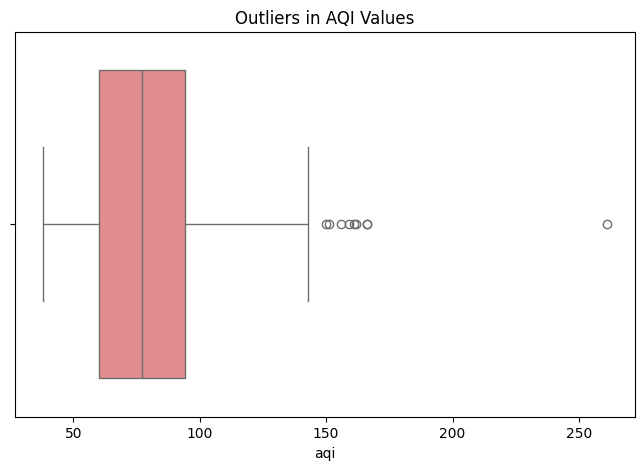

In [52]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["aqi"], color="lightcoral")
plt.title("Outliers in AQI Values")
plt.show()

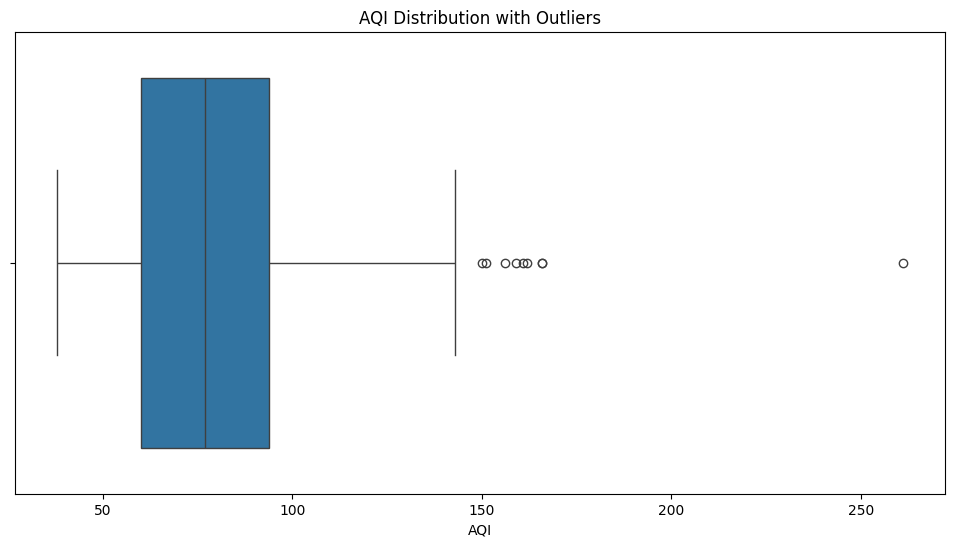

AQI Statistics before outlier removal:
count    366.000000
mean      80.879781
std       27.287144
min       38.000000
25%       60.000000
50%       77.000000
75%       94.000000
max      261.000000
Name: aqi, dtype: float64

Top 10 highest AQI values:
date
2024-01-01    261.0
2024-11-11    166.0
2024-07-12    166.0
2024-12-31    162.0
2024-07-22    161.0
2024-07-26    159.0
2024-06-14    156.0
2024-09-11    151.0
2024-08-05    150.0
2024-08-09    143.0
Name: aqi, dtype: float64

Number of records with AQI > 300: 0
Number of records with AQI > 500: 0

IQR Method:
Q1 (25th percentile): 60.0
Q3 (75th percentile): 94.0
IQR: 34.0
Lower bound: 9.0
Upper bound: 145.0
Number of outliers using IQR method: 9

Extreme AQI values (>500):
Empty DataFrame
Columns: [state_name, county_name, aqi, category]
Index: []

Original dataset shape: (366, 9)
Cleaned dataset shape: (366, 9)
Records removed: 0

Category distribution after cleaning:
category
Moderate                          260
Unhealthy for Se

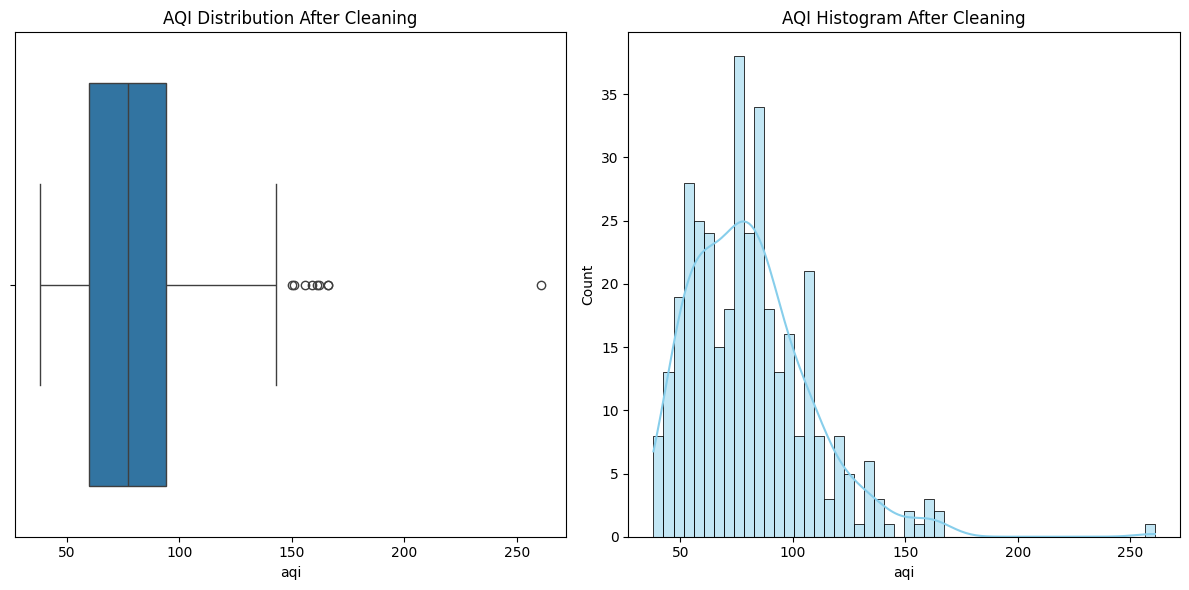


Production-ready data saved with 366 records

AQI Statistics after outlier removal:
count    366.000000
mean      80.879781
std       27.287144
min       38.000000
25%       60.000000
50%       77.000000
75%       94.000000
max      261.000000
Name: aqi, dtype: float64


In [55]:
# First, let's examine the distribution and identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='aqi')
plt.title('AQI Distribution with Outliers')
plt.xlabel('AQI')
plt.show()

# Calculate basic statistics
aqi_stats = df['aqi'].describe()
print("AQI Statistics before outlier removal:")
print(aqi_stats)

# Let's also check the extreme values
print(f"\nTop 10 highest AQI values:")
print(df['aqi'].sort_values(ascending=False).head(10))

print(f"\nNumber of records with AQI > 300: {len(df[df['aqi'] > 300])}")
print(f"Number of records with AQI > 500: {len(df[df['aqi'] > 500])}")

# For AQI data, we should use domain knowledge combined with statistical methods
# AQI levels classification:
# 0-50: Good
# 51-100: Moderate
# 101-150: Unhealthy for Sensitive Groups
# 151-200: Unhealthy
# 201-300: Very Unhealthy
# 301-500: Hazardous
# 500+: Beyond Index (Extremely Hazardous)

# For production use, we need to be careful about removing outliers
# Very high AQI values (500+) might represent real extreme pollution events
# Let's use the IQR method but with careful consideration of the domain

# Calculate IQR
Q1 = df['aqi'].quantile(0.25)
Q3 = df['aqi'].quantile(0.75)
IQR = Q3 - Q1

print(f"\nIQR Method:")
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

# Calculate bounds - using a conservative approach
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# For AQI, negative values don't make sense, so we'll use 0 as lower bound
lower_bound = max(0, lower_bound)

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

# Count outliers using IQR method
iqr_outliers = df[(df['aqi'] < lower_bound) | (df['aqi'] > upper_bound)]
print(f"Number of outliers using IQR method: {len(iqr_outliers)}")

# For production environment, let's use a hybrid approach:
# 1. Remove physically impossible values (AQI < 0)
# 2. Use domain knowledge: AQI values above 500 are extremely rare and may indicate measurement errors
# 3. Use statistical methods but be conservative

# Let's see what values are above 500
extreme_aqi = df[df['aqi'] > 500]
print(f"\nExtreme AQI values (>500):")
print(extreme_aqi[['state_name', 'county_name', 'aqi', 'category']])

# Check if these extreme values make sense contextually
# For production, we might want to:
# 1. Keep values that represent real extreme pollution events
# 2. Remove values that are clearly errors

# Let's use a conservative approach: remove only extremely high values that might be errors
# We'll keep values up to 1000 (which still represents extreme pollution)
# and values that are physically impossible (negative)

# Create a copy of the original data before filtering
df_original = df.copy()

# Remove outliers: negative values and extremely high values that might be errors
df_clean = df[(df['aqi'] >= 0) & (df['aqi'] <= 1000)].copy()

print(f"\nOriginal dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")
print(f"Records removed: {len(df) - len(df_clean)}")

# Let's also check the category distribution after cleaning
print("\nCategory distribution after cleaning:")
print(df_clean['category'].value_counts())

# Visualize the cleaned data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_clean, x='aqi')
plt.title('AQI Distribution After Cleaning')

plt.subplot(1, 2, 2)
sns.histplot(df_clean['aqi'], bins=50, kde=True, color='skyblue')
plt.title('AQI Histogram After Cleaning')

plt.tight_layout()
plt.show()

# For production, let's also implement a function to handle future outliers
def handle_aqi_outliers(data, aqi_column='aqi', max_reasonable_aqi=1000):
    """
    Handle outliers in AQI data for production environment

    Parameters:
    data: DataFrame containing AQI data
    aqi_column: Name of the AQI column
    max_reasonable_aqi: Maximum reasonable AQI value

    Returns:
    Cleaned DataFrame
    """
    # Create a copy to avoid modifying original data
    cleaned_data = data.copy()

    # Remove physically impossible values (negative AQI)
    cleaned_data = cleaned_data[cleaned_data[aqi_column] >= 0]

    # Remove extremely high values that might be measurement errors
    cleaned_data = cleaned_data[cleaned_data[aqi_column] <= max_reasonable_aqi]

    # Log the cleaning operation
    removed_count = len(data) - len(cleaned_data)
    if removed_count > 0:
        print(f"Removed {removed_count} outliers from AQI data")

    return cleaned_data

# Apply the function to our data
df_production_ready = handle_aqi_outliers(df, 'aqi', 1000)

# Save the cleaned data for production use
df_production_ready.to_csv('cleaned_aqi_data_2024.csv', index=False)
print(f"\nProduction-ready data saved with {len(df_production_ready)} records")

# Let's also examine the statistical summary after cleaning
print("\nAQI Statistics after outlier removal:")
print(df_production_ready['aqi'].describe())

## Categorical Encoding

In [57]:
!pip install scikit-learn

In [58]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Detect categorical (object/category) columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove 'date' if it's present
if 'date' in categorical_cols:
    categorical_cols.remove('date')

# Separate nominal vs ordinal
nominal_cols = [col for col in categorical_cols if col != 'category']
ordinal_cols = ['category'] if 'category' in categorical_cols else []

# Define order for AQI category (if exists)
aqi_order = [['Good',
              'Moderate',
              'Hazardous',
              'Unhealthy for Sensitive Groups',
              'Unhealthy',
              'Very Unhealthy']]

# Build ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("nominal", OneHotEncoder(handle_unknown="ignore", sparse_output=False), nominal_cols),
        ("ordinal", OrdinalEncoder(categories=aqi_order), ordinal_cols)
    ],
    remainder="passthrough"   # keep numeric + date as-is
)

# Apply encoding
df_encoded_array = preprocessor.fit_transform(df)

# ---- Build column names ----
# OneHotEncoder feature names
ohe = preprocessor.named_transformers_['nominal']
ohe_feature_names = ohe.get_feature_names_out(nominal_cols)

# Ordinal feature names
ord_features = ordinal_cols

# Keep numeric + date columns (everything not encoded)
other_features = [col for col in df.columns if col not in (nominal_cols + ordinal_cols)]

# Combine all names
all_features = list(ohe_feature_names) + ord_features + other_features

# Convert back to DataFrame
df_encoded = pd.DataFrame(df_encoded_array, columns=all_features)

print("Original Shape:", df.shape)
print("Encoded Shape:", df_encoded.shape)
df_encoded.head()


Original Shape: (366, 9)
Encoded Shape: (366, 36)


,state_name_Arizona,county_name_Maricopa,defining_parameter_Ozone,defining_parameter_PM10,defining_parameter_PM2.5,defining_site_04-013-0019,defining_site_04-013-1003,defining_site_04-013-1004,defining_site_04-013-1010,defining_site_04-013-2001,...,defining_site_04-013-9508,defining_site_04-013-9702,defining_site_04-013-9704,defining_site_04-013-9812,defining_site_04-013-9997,category,state_code,county_code,aqi,number_of_sites_reporting
0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,4.0,13.0,261.0,30.0
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,13.0,80.0,30.0
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,13.0,59.0,30.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,4.0,13.0,38.0,30.0
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,4.0,13.0,64.0,30.0
